<font size="7" color="#013365">Text Analytics</font>

<font size="5" color="#ad9e6e">Assignment II</font>

<font size="3" color="#124c4b">**Group 7 -** Rahul Saha, N M Emran Hussain, Chipo Jaya</font>



## Environment Setup

In [ ]:
# Import required libraries
import kagglehub
import pandas as pd
import numpy as np
import os

print("Downloading dataset...")
path_to_dir = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")

# Find and read the dataset
csv_file = [f for f in os.listdir(path_to_dir) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path_to_dir, csv_file))
print(f"Dataset loaded successfully with shape {df.shape}")
df.head()

Dataset loaded successfully with shape (4238, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Data Exploration

In [ ]:
# Basic info and summary statistics
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


TenYearCHD
0    84.804153
1    15.195847
Name: proportion, dtype: float64


/tmp/ipython-input-3696483068.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=df, palette='coolwarm')


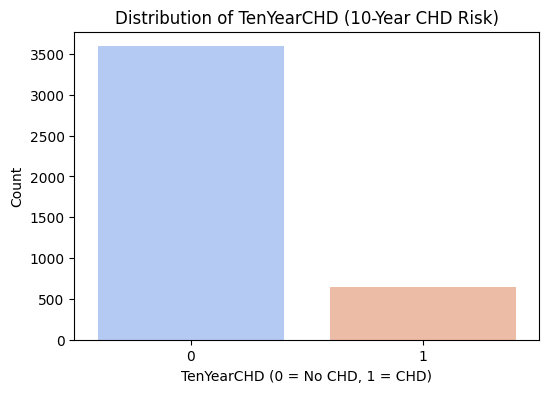

In [ ]:
# Explore Target Variable
import seaborn as sns
import matplotlib.pyplot as plt

target_counts = df['TenYearCHD'].value_counts(normalize=True) * 100
print(target_counts)

plt.figure(figsize=(6,4))
sns.countplot(x='TenYearCHD', data=df, palette='coolwarm')
plt.title('Distribution of TenYearCHD (10-Year CHD Risk)')
plt.xlabel('TenYearCHD (0 = No CHD, 1 = CHD)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Check missing value percentages
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0]

,0
education,2.477584
cigsPerDay,0.684285
BPMeds,1.250590
totChol,1.179802
BMI,0.448325
heartRate,0.023596
glucose,9.155262


In [ ]:
from sklearn.impute import SimpleImputer

# Drop unnecessary columns
df = df.drop(columns=['education'], errors='ignore')

# Impute numeric columns
imputer = SimpleImputer(strategy='mean')
numeric_cols = df.columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

print("Missing values handled successfully.")

Missing values handled successfully.


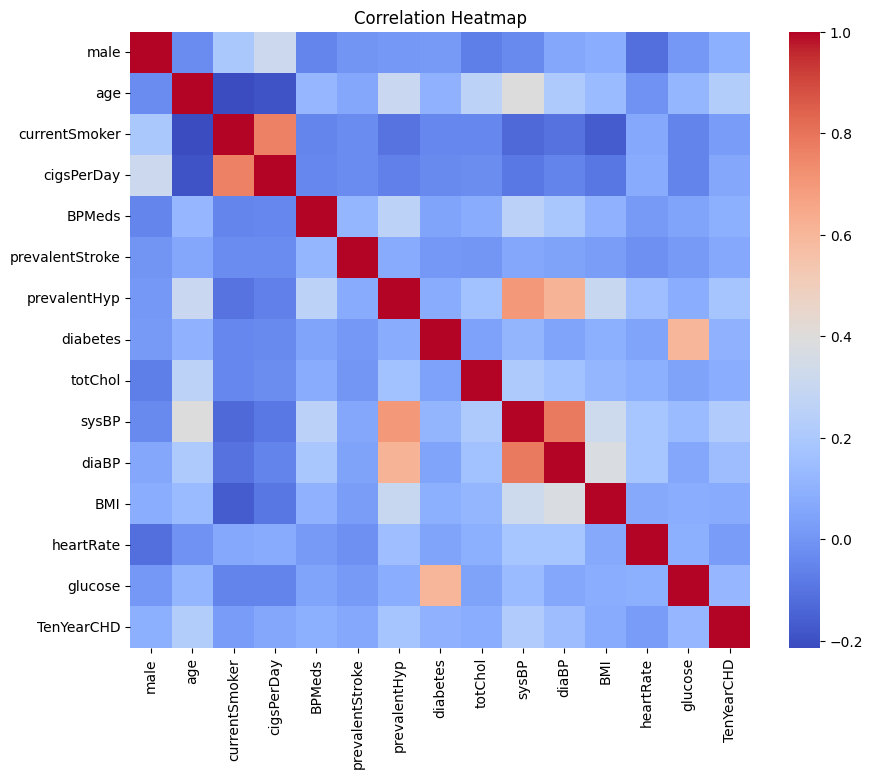

In [ ]:
# Correlation Analysis
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-137976536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=f, data=df, palette='coolwarm')


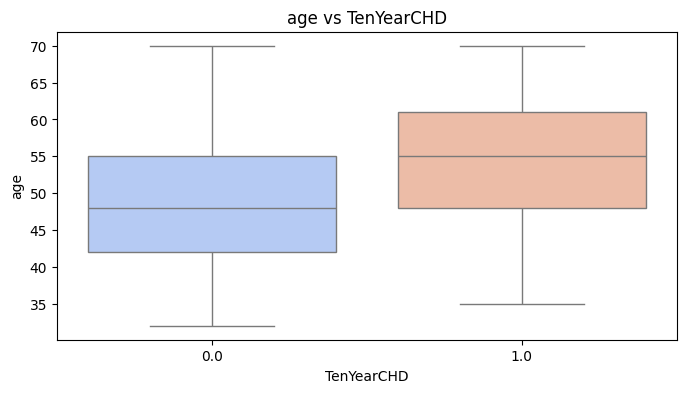

/tmp/ipython-input-137976536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=f, data=df, palette='coolwarm')


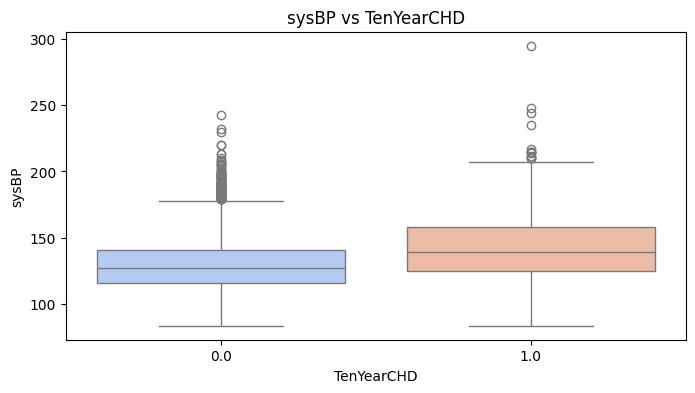

/tmp/ipython-input-137976536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=f, data=df, palette='coolwarm')


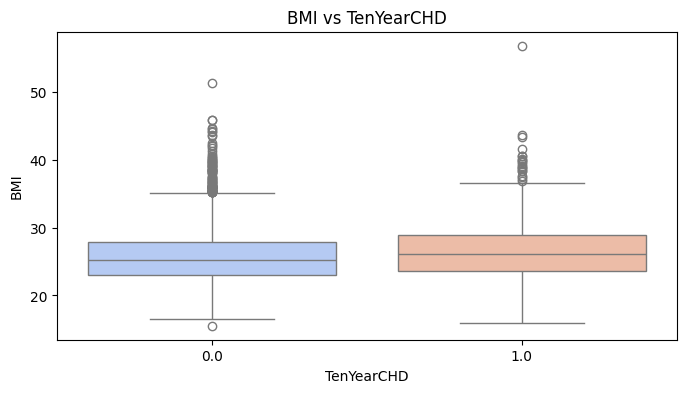

In [ ]:
# Relationship with CHD
features = ['age', 'sysBP', 'BMI']
for f in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='TenYearCHD', y=f, data=df, palette='coolwarm')
    plt.title(f'{f} vs TenYearCHD')
    plt.show()

## Training and evaluating the model

In [ ]:
# Model Building – Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

# Prepare data
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD'].astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8479

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       719
           1       0.50      0.05      0.10       129

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.51       848
weighted avg       0.80      0.85      0.79       848



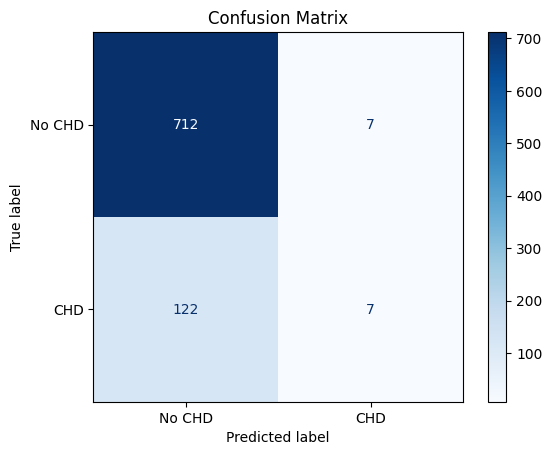

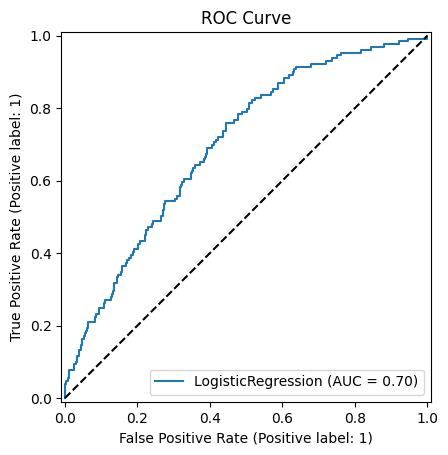

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', display_labels=['No CHD', 'CHD'])
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0,1],[0,1],'k--')
plt.show()


AUC Score: 0.697


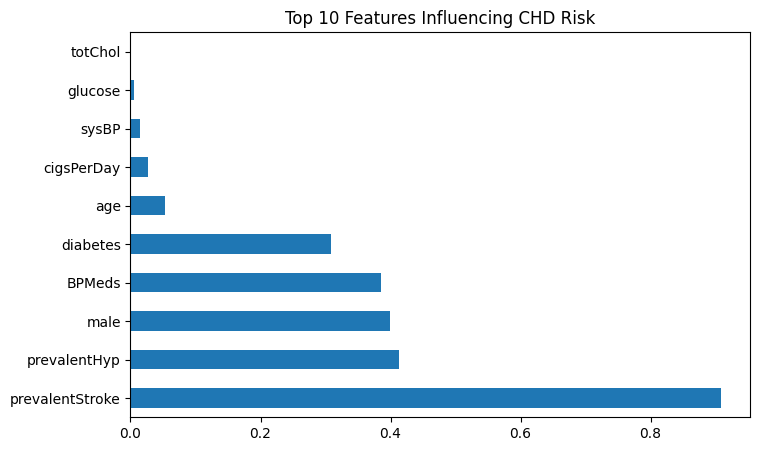

In [ ]:
# Additional Metrics & Feature Importance
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"AUC Score: {auc:.3f}")

# Feature Importance
importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
importance.head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Features Influencing CHD Risk")
plt.show()

## Summary

The analysis used the Framingham Heart Study dataset to predict 10-year coronary heart disease (CHD) risk using Logistic Regression.

- **Accuracy:** 84.8%  
- **AUC:** 0.697  
- **Recall (CHD=1):** Low (0.05) indicates class imbalance.

Key predictors were **age**, **systolic BP**, and **cholesterol**, consistent with medical expectations.

Although overall accuracy is high, the model performs poorly in detecting positive CHD cases. And the results provide a good starting point for CHD risk prediction with interpretable insights.
